In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

hotel-reviews.csv



In [0]:
df = pd.read_csv('../input/hotel-reviews.csv')
print(df.columns)
print(df.shape)

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')
(38932, 5)


In [0]:
df = df.dropna()
print(df.User_ID.nunique())
print(df.Is_Response.nunique())

38932
2


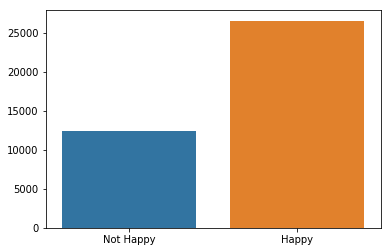

In [0]:
zero = len(df[df.Is_Response =='not happy'])
one = len(df[df.Is_Response =='happy'])

li_response = [zero,one]
label_response = ['Not Happy','Happy']

index_response = np.arange(len(li_response))

sn.barplot(label_response,li_response)
plt.show()

In [0]:
df['Browser_Used'].shape
df['Browser_Used'].value_counts()

#Redundant values are present. eg:"Internet Explorer" is written as "InternetExplorer" / "Explorer", etc

##MOZILLA IS MOST USED BROWSER

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


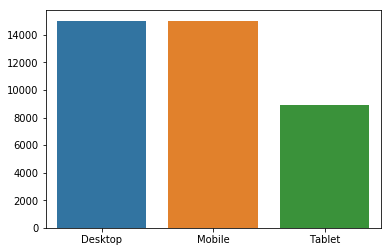

In [0]:
device = df.Device_Used
desktop = len(device[device=='Desktop'])
mobile = len(device[device=='Mobile'])
tablet = len(device[device=='Tablet'])
print(device.value_counts())
label_device = ['Desktop','Mobile','Tablet']
li_device = [desktop,mobile,tablet]

index_device = np.arange(len(label_device))

sn.barplot(label_device,li_device)
plt.show()

In [0]:
import re
describe = df['Description']
review_text = " ".join(describe)
  
review_text = re.sub(r"[^A-Za-z0-9(),!.?\'\`]", " ",review_text)
review_text = re.sub(r"\'s", " 's ", review_text)
review_text = re.sub(r"\'ve", " 've ", review_text)
review_text = re.sub(r"n\'t", " 't ", review_text)
review_text = re.sub(r"\'re", " 're ", review_text)
review_text = re.sub(r"\'d", " 'd ", review_text)
review_text = re.sub(r"\'ll", " 'll ", review_text)
review_text = re.sub(r",", " ", review_text)
review_text = re.sub(r"\.", " ", review_text)
review_text = re.sub(r"!", " ", review_text)
review_text = re.sub(r"\(", " ( ", review_text)
review_text = re.sub(r"\)", " ) ", review_text)
review_text = re.sub(r"\?", " ", review_text)
review_text = re.sub(r"\s{2,}", " ", review_text)
  
describe = review_text.split()

print(len(describe))

6202243


In [0]:
description = df['Description'][:20000]

In [0]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
describe = [w for w in describe if not w in stop_words]

In [0]:
len(describe)

3524598

In [0]:
X = df.iloc[:,1:4]
Y = df.iloc[:20000,-1].factorize()[0]
Y= Y.astype('int')

In [0]:
#**No. of FEATURES in this is less so there is no use of performing Select K Best or any Feature Importance**#
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(sublinear_tf = True,min_df =5,encoding='latin-1',ngram_range=(1,2),stop_words='english')
features = tfidf.fit_transform(description).toarray()
labels = Y

print(features.shape)
print(labels.shape)

(20000, 47262)
(20000,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size=0.2,random_state=20)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix

clf = LogisticRegression(random_state=30,solver='lbfgs',multi_class='ovr').fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,Y_test))   #OR np.mean(y_pred == Y_test)

Accuracy Score: 0.87275


0.12725


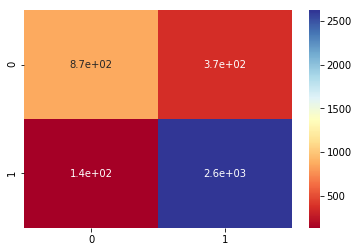

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
mse = mean_squared_error(Y_test,y_pred)
print(mse)

sn.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap='RdYlBu')
plt.show()